In [1]:
%run utils.ipynb

Loaded data from cached archive.


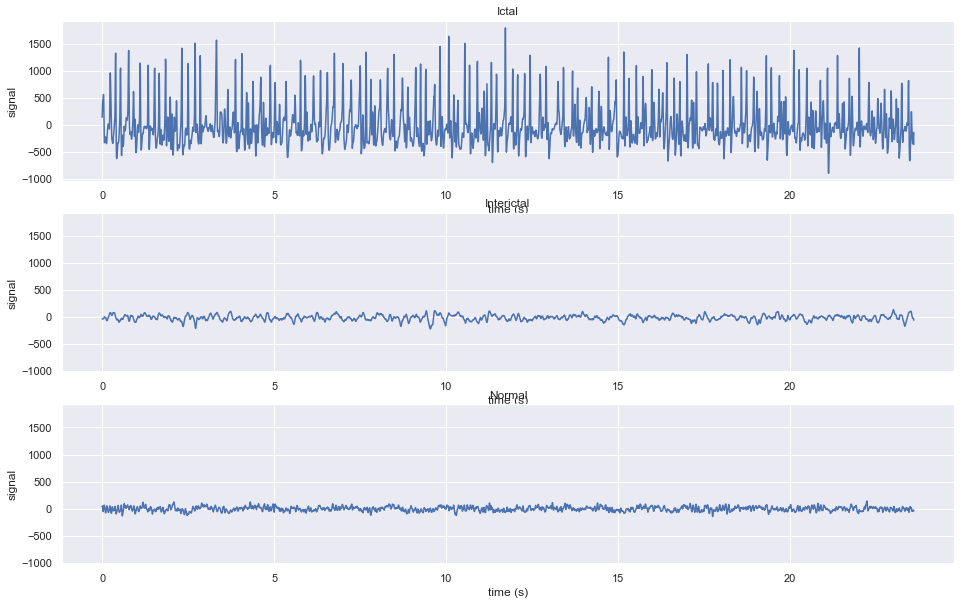

In [2]:
eeg = loadDataset()
describeEEGDataset(eeg)

In [34]:
freq = 10
amp = 25
eeg["noisy_measurements"] = addNoiseToEEG(eeg, freq, amp)

In [35]:
clean = eeg["measurements"][0]
noisy = eeg["noisy_measurements"][0]

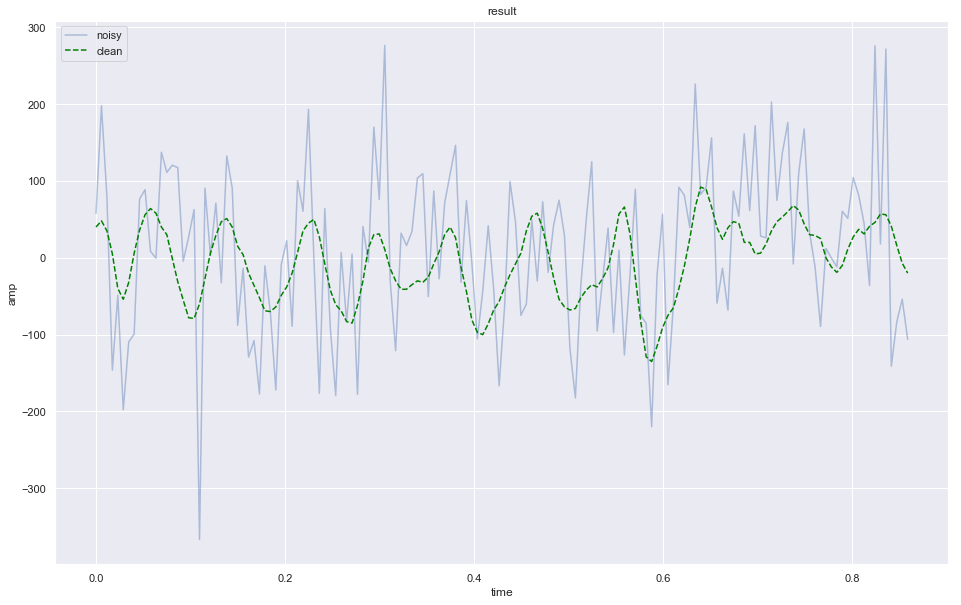

In [36]:
plt.figure(figsize=(16,10))
plt.plot(eeg["times"][0][:150], noisy[:150], alpha=0.4, label="noisy")
plt.plot(eeg["times"][0][:150], clean[:150], '--', color='green', label="clean")

# naming the x axis 
plt.xlabel('time') 
# naming the y axis 
plt.ylabel('amp') 
# giving a title to my graph 
plt.title('result') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

# Explore the freq domain

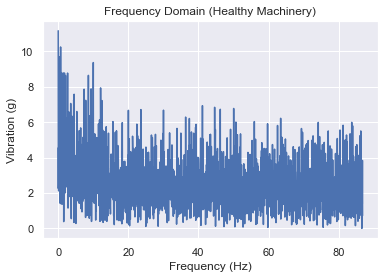

In [37]:
from scipy.fftpack import fft

data = eeg["noisy_measurements"][0]
N = len(data) #array size
sampling_rate = 173.61

# Nyquist Sampling Criteria
T = 1/sampling_rate # inverse of the sampling rate
x = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

# FFT algorithm
yr = fft(data) # "raw" FFT with both + and - frequencies
y = 2/N * np.abs(yr[0:np.int(N/2)]) # positive freqs only

# Plotting the results
plt.plot(x, y)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.title('Frequency Domain (Healthy Machinery)');